### Matemáticas para Data Science: Estadística Descriptiva

En este articulo nos apoyaremos de las librerias Numpy y Pandas.

[Aprende a usar Numpy](https://www.youtube.com/watch?v=G8t7gMgY5JM&list=PLg9145ptuAij_8zYgMeqwOV8ABwRYLuR3)

[Aprende a usar Pandas](https://www.youtube.com/watch?v=1CIZFu_qWvk&list=PLjdo6jnQHJFYUxftilqXD1pgzq9E9yJze)


In [77]:
# Dependencias Generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tema 1: ¿Para qué sirve la estadística descriptiva?

## Estadística descriptiva vs. inferencial

### Diferencia entre descriptiva vs inferencial

**La estadística descriptiva**

 es la técnica matemática que obtiene, **organiza**, **presenta** y **describe un conjunto de datos para facilitar el uso**, generalmente con el apoyo de tablas, medidas numéricas o gráficas. En resumen la estadistica descriptiva trata de resumir informacion

**La estadística inferencial**

Es una parte de la estadística que comprende los métodos y procedimientos que **por** medio de la **inducción determina propiedades de una población estadística**, a partir de una parte de esta. **Su objetivo** es **obtener conclusiones** útiles **para hacer deducciones** sobre una totalidad, **basándose** en la información numérica **de la muestra**.

### Puedes mentir con estadistica?

- **El resultado podría estar sesgado a nuestro criterio personal**, mostrando mayor interés a un cierto parámetro. dejando de lado a otro que también podría ser relevante. Mostramos solo una cara de la moneda.

- **No existen definiciones objetivas en estadística**, sin embargo sobre estas definiciones podemos realizar cálculos exactos lo cual es un problema

- **Los diferentes estadísticos** descriptivos **dan nociones diferentes sobre los mismos datos**.

> "Con frecuencia construimos un caso estadistico con datos imperfectos, como resultado hay numerosas razones por las cuales individuos intelectuaels respetables pueden no estar de acuerdo sobre los resultados estadisticos."  
> *-Naked Statistics, Charles Wheelan*

### ¿Por que aprender estadística?

A pesar de los problemas que pueda presentar es muy importante entender que la estadística nos puede ayudar a:

- Resumir grandes cantidades de información.
- tomar mejores decisiones.
- responder preguntas con relevancia social (economia, politica, etc).
- reconocer patrones en los datos.
- descubrir a quien usan estas herramientas para mentir sobre informacion.

Hay que entender que resumir informacion conlleva perder informacion, y no caer en las verdades a medias, que omiten el contexto globar para usar como elemento engañoso para tergiversar la verdad.

## Flujo de trabajo en data science
![](https://www.oreilly.com/library/view/machine-learning-design/9781098115777/assets/mldp_0102.png)

Como son los casos especificos donde se encuentra la estadistica?

- **Ingesta de datos y Validación:**

    Se encarga de todo el procesamiento de **ETL** (Extract Transform Load) **obtener los datos**, **limpiarlos** y **estructurarlos**, **crear pipelines de análisis automatizado**, es decir que transformaciones vamos a realizar a los datos para que estén listos para el caso especifico de estudio que vamos a realizar.

- **Preparación y entrenamiento del modelo:**

    En este bloque **se va a realizar** un **análisis exploratorio de los datos con estadística descriptiva**, entender **correlaciones** y realizar posibles **reducciones de datos**.

- **Evaluar el modelo, Producción e Interacción:**

    esta parte del flujo se basa mas en la **estadística inferencial**.

[Acelerar el flujo de trabajo en Ciencia de Datos BBVA](https://www.bbvaaifactory.com/es/accelerating-data-science-workflows/)

## Plan del curso

La estadistica descriptiva es un area comun de las matematicas, hay una numerosa cantidad de libros, articulos, apuntes y cursos que tratan este tema.

Pero en este curso se guiara la Estadistica Descriptiva en el caso particular de Ciencias de Datos, entender no solo las formulas matematicas que estan detras de las estadisticas descriptivas que debemos calcular, sino tambien en el contexto que da el libro [Naked Statistic](https://www.amazon.com/-/es/Charles-Wheelan-ebook/dp/B007Q6XLF2/), a como indentificar cual es la cara correcta de la moneda dependiendo del contexto.

**Del bloque de flujo de trabajo en Data Science se trabajara:**

Estadísticas para ingesta y procesamiento

- Conocer los tipos de datos: si son numéricos, cadenas de texto, estructurado, etc.
- Pipeline o flujo de procesamiento de estos: lo que haremos a los datos para que sean útiles.

Estadística para analítica y exploración

- Análisis exploratorio de los datos, base de la estadística descriptiva.
- Identificar correlaciones para buscar la reducción del conjunto de datos

# Tema 2: Estadística descriptiva para analítica

## Tipos de datos en estadística inferencial 

Aquí tenemos en cuenta los diferentes tipos de datos o variables estructuradas en cualquier problema de ciencia de datos.

### datos categóricos: 
* **ordinales (object)**

    Los datos ordinales representan unidades discretas y ordenadas, su orden es importante.


* **nominales (bool)**

    Se usan para etiquetar variables que no tienen un valor cuantitativo.
    
    Estos datos no tienen un orden, aunque cambiara el orden de sus valores, no cambia su significado.

### datos numéricos: 
* **discretos (int64)**
    Se dice que una variable es discreta cuando no puede tomar ningún valor entre dos consecutivos
    
    Un objeto discreto tiene límites conocidos y definibles. Es fácil definir con precisión dónde comienza y dónde termina el objeto.



* **continuos (float64)**
    Las variables continuas pueden tomar cualquier valor dentro de un intervalo.
    Los datos continuos representan mediciones y, por lo tanto, sus valores. no se pueden contar, pero se pueden medir. 
     
a continuación exploraremos un dataset que contiene todos estos tipos de datos: https://www.kaggle.com/lepchenkov/usedcarscatalog

In [78]:
df = pd.read_csv('./cars.csv')
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


los tipos de datos de cada columna en el dataset se pueden obtener directamente con `pandas.DataFrame.dtypes` 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

In [79]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

Aquí vemos que los tipos de datos se identifican de la siguiente manera: 

* Categoricos: `object`, `bool`
* Numéricos: `int64` (discreto), `float64` (contínuo)

Ahora, con la libreria pandas podemos generar un conjunto completo de estadisticos descriptivos del dataset usando `pandas.DataFrame.describe()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [80]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


En los siguientes capitulos trabajaremos con los siguientes tipos de estadisticos descriptivos

- **Medidas de tendencia Central:**
 
Mide con el promedio o medida de tendencia unica, para tener una nocion de donde estan los datos

- **Medidas de dispersión:**
 
Me dicen respecto a la medida central que tan dispersos estan los datos

## Medidas de tendencia central

### Que son las Medidas de tendencia central?

Son medidas estadísticas que **pretenden resumir en un solo valor** a **un conjunto de valores**. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos. **Las medidas** de tendencia central **más utilizadas** son: **media**, **mediana** y **moda**


### Media Arimetica

En matemáticas y estadística, **la media aritmética, también llamada promedio** o simplemente media, **se obtiene al sumar todos los números en el conjunto** de datos **y** luego al **dividirlo entre el número de valores en el conjunto**.

Dados los n números ${ \{x_{1},x_{2},\ldots ,x_{n}\}}$, la **media aritmética** se define como:

$$
{\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}
$$


Por ejemplo, la media aritmética de 8, 5 y -1 es igual a:



$$
 \bar{x} = \frac{ 8 + 5 + \left ( -1 \right ) }{3} = 4 
$$

#### Ejemplo con Codigo

In [81]:
salarios = np.random.randint(1600,8000,100) # Creamos 100 salarios aleatorios donde el min es 1600 y max 8000

suma_salarios = np.sum(salarios)
numero_total_de_salarios = len(salarios)

media_arimetica = suma_salarios/numero_total_de_salarios

print(f"""
La suma del conjuto de salarios es: {suma_salarios}
La cantidad de salarios sumados es: {numero_total_de_salarios}
             La media arimetica es: {media_arimetica}
""")


La suma del conjuto de salarios es: 485940
La cantidad de salarios sumados es: 100
             La media arimetica es: 4859.4



### Mediana (para conjuntos ordenados)

**la mediana es el valor** de la variable de posición **central en un conjunto de datos ordenados**.

Sean ${ x_{1},x_{2},x_{3},\ldots ,x_{n}}$ los datos de una muestra ordenada en orden creciente y designando la mediana como ${ M_{e}}$, distinguimos dos casos:

#### Si n es impar

La mediana es el valor que ocupa la posición $(n+1)/2$ una vez que los datos han sido ordenados (en orden creciente o decreciente), porque este es el valor central. 

Es decir: 

$
M_{e}=x_{{(n+1)/2}}
$

Por ejemplo, si tenemos 5 datos, que ordenados son: 

$x_{1}=3,$

$x_{2}=6,$ 

$x_{3}=7,$ 

$x_{4}=8,$ 

$x_{5}=9$

El valor central es el tercero: 

$$
x_{(5+1)/2}=x_{3}=7
$$

Este valor, que es la mediana de ese conjunto de datos, deja dos datos por debajo ($x_{1}$, $x_{2}$) y otros dos por encima de él (${ x_{4}}$, ${ x_{5}}$).

#### Ejemplo con Codigo Impar

In [82]:
notas = np.linspace(1,10, 7).round()

datos = len(notas)

indice_mediana = int((datos-1)/2) # En programacion el indice empieza desde el 0, no el 1, por eso se resta 1

mediana = notas[indice_mediana]

print(f"""
            La lista de notas es: {notas}
La cantidad de notas cargadas es: {datos}
      El indice de la mediana es: {indice_mediana}
       El valor de la Mediana es: {mediana}
""")


            La lista de notas es: [ 1.  2.  4.  6.  7.  8. 10.]
La cantidad de notas cargadas es: 7
      El indice de la mediana es: 3
       El valor de la Mediana es: 6.0



#### Si n es par

La mediana es la media aritmética de los dos valores centrales. Cuando $n$ es par, los dos datos que están en el centro de la muestra ocupan las posiciones $n/2$ y ${(n/2)+1}$. 

Es decir: 

$$
{ M_{e}=\frac{(x_{\frac {n}{2}}+x_{{\frac {n}{2}}+1})}2}
$$

Por ejemplo, si tenemos 6 datos, que ordenados son:

$x_{1}=3,$

$x_{2}=6,$ 

$x_{3}=7,$ 

$x_{4}=8,$ 

$x_{5}=9$

$x_{6}=10$

Hay dos valores que están por debajo del $x_{{{\frac  {6}{2}}}}=x_{3}=7$ y otros dos que quedan por y otros dos que quedan por encima del siguiente dato $x_{{{\frac  {6}{2}+1}}}=x_{4}=8$

Por tanto, la mediana de este grupo de datos es la media aritmética de estos dos datos: 
$$
M_{e}={\frac  {x_{3}+x_{4}}{2}}={\frac  {7+8}{2}}=7,5
$$
#### Ejemplo con Codigo Par

In [83]:
notas = np.linspace(1,10, 8).round()
mediana = np.median(notas)
print(mediana)

5.5


### Moda

**Es el valor** que aparece **con mayor frecuencia** en un conjunto de datos.

- **Una distribucion bimodal** de los datos **es en la que encontremos dos modas**, es decir, dos datos que tengan la *frecuencia absoluta máxima*. 

- **En una distribución trimodal** de los datos es en la que **encontramos tres modas**.

- **Para mas de tres modas seria una distribudion multimodal**

- **En** el caso de **la distribución uniforme discreta**, cuando **todos los datos tienen una misma frecuencia**, se puede definir las modas como indicado, pero estos lores **no tienen utilidad**. Por eso algunos matemáticos califican esta distribución como *"sin moda"*.

- **El intervalo modal es el valor que representa la mayor frecuencia absoluta**. Cuando tratamos con datos agrupados antes de definir la moda, se ha de definir el intervalo modal.

$$
x_k \text{ donde } \text{Freq}(x_k) = \max{(\text{Freq}(x_i))}
$$

### Diagrama de frecuencias

![](./img/diagrama%20de%20frecuencias.jpg)

Es un gráfico de líneas que se usa para presentar las frecuencias absolutas de los valores de una distribución en el cual la altura del punto asociado a un valor de las variables es proporcional a la frecuencia de dicho valor. Es un gráfico acumulativo.

### Cuando usar cual?
- La media es susceptible a valores atípicos. La medida resultante del promedio es afectada notablemente por los casos de excepsiones al conjunto de dato central.

- La moda no aplica para datos numéricos continuos.

### Datos extra
- [Media ponderada](https://es.wikipedia.org/wiki/Media_ponderada)
- [Media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica)
- [Media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica)

### Metáfora de Bill Gates en un bar

Se nos pide calcular la media de salarios en un bar, tenemos los registros de 13 voluntarios donde sus sueldos rondaban entre los 25.000 a 45.000 dolares anuales, y tambien se encontraba Bill Gates que tiene un sueldo de 250.000 dolares anuales.


El promedio es de los sueldos es: $47398.642857142855
La mediana es de los sueldos es:  $32843.0 



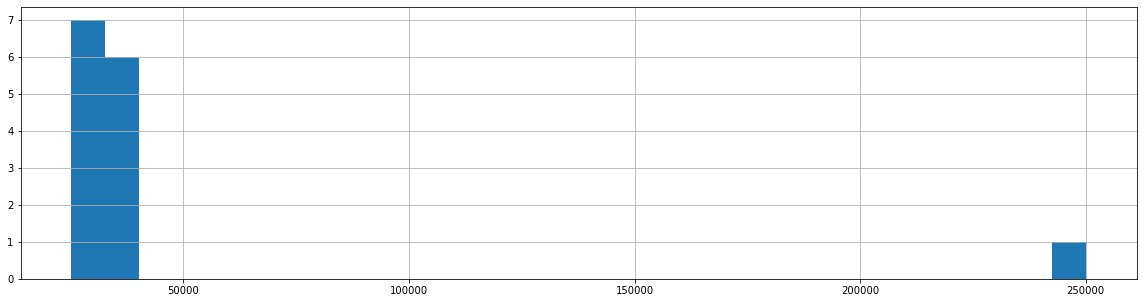

In [84]:
salarios = np.random.randint(25000,45000, 13)
bill_gates = np.array(250000)
salarios_y_bill_gates = np.union1d(salarios,bill_gates)

numeros_de_datos = len(salarios_y_bill_gates)

media_arimetica = np.mean(salarios_y_bill_gates)
mediana = np.median(salarios_y_bill_gates)


print(f"""
El promedio es de los sueldos es: ${media_arimetica}
La mediana es de los sueldos es:  ${mediana} 
""")

plt.figure(figsize=(20,5))
plt.hist(salarios_y_bill_gates, bins=30)
plt.grid()
plt.show()

#### Conclusiones
Vemos que segun la Media Arimetica, el sueldo promedio se encuentra en los $50 mil dolares, cuando este resultado es incluso mayor del maximo que gana cualquier voluntario en los datos (exceptuando por Bill Gates), mientras que la Mediana nos da un rango mas cercano a la realidad entre los $35mil dolares por voluntario, y en el histograma podemos ver que la centralidad de los datos esta tambien entre los $35mil dolares

**Dejando estas conclusiones:**

- Esta metáfora nos muestra que al tener valores atípicos nuestra media se vera sesgada o desviada.

- La mediana será un mejor valor para manejar un conjunto de datos con valores atípicos.

### Medidas de tendencia central en Python (Practica)

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [85]:
df = pd.read_csv("./cars.csv") # Cargamos la base de datos
pd.options.display.max_columns = 0 # para visualiar todas las columnas
df # Visualizamos las dos primeras filas del BD

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


In [86]:
# inspeccionemos el atributo de price_usd (variable numérica continua) de los autos listados en el dataset:

df['price_usd'].mean() # Vemos el promedio de precio en todo el catalogo

6639.971021255604

In [87]:
df['price_usd'].median() # Vemos la mediana en el catalogo

4800.0

<AxesSubplot:ylabel='Frequency'>

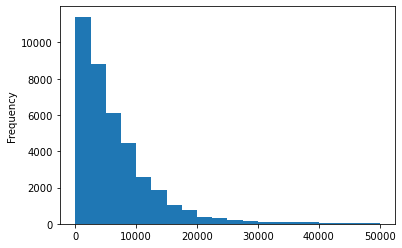

In [88]:
df['price_usd'].plot.hist(bins=20) # Graficamos el histograma

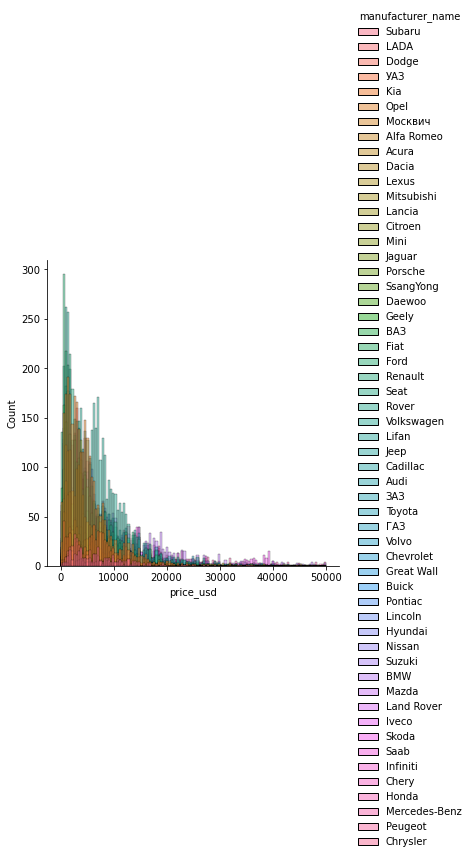

In [89]:
# resulta más interesante analizar los precios por marcas, asi que utilizaremos la libreria SeaBorn que se especializa para la visualizacion estadistica. 


sns.displot(data=df, x='price_usd', hue='manufacturer_name'); 

# Lo que vemos es que nos da de resultado un grafico muy sobrecargado, ,y al haber tantas categorias, el grafico pierde el proposito de facilitar la informacion

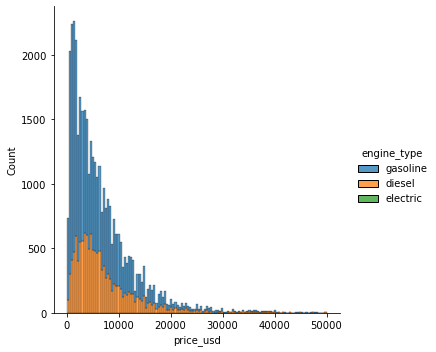

In [90]:
# Puede tener mas sentido analizar los autos por una categoria

sns.displot(data=df, x='price_usd', hue='engine_type', multiple='stack');

In [91]:
# No se aprecian los autos eléctricos en el histograma, así que haremos un conteo de los autos teniendo en cuenta si es a diesel, gasolina o electrico

df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


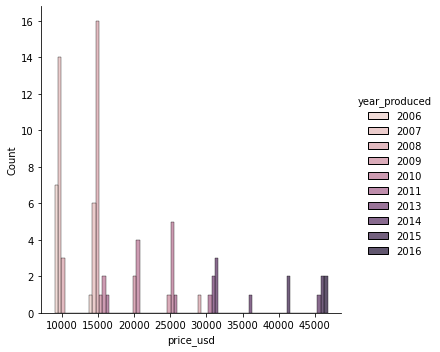

In [92]:
# El histograma anterior era dificil de analizar ya que no se podiamos ver los autos electricos

# Ahora inspeccionaremos los precios de una marca y modelo en particular para hacer la informacion mas facil de leer

Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')] # Filtramos con PanDas el DataFrame de los autos que queremos clasificar 

sns.displot(data=Q7_df, x='price_usd',hue='year_produced', multiple='dodge')


### Reto
Realiza una busqueda sobre el tipo de auto que te gustaria segun tus necesidades, la base de dato trabajada.

<AxesSubplot:xlabel='price_usd', ylabel='year_produced'>

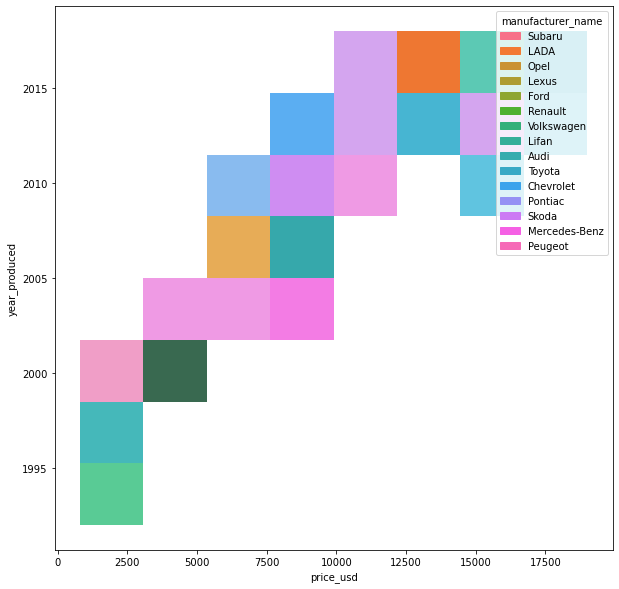

In [93]:
autaco = df[
    (df['transmission']=='automatic') & 
    (df['body_type'] > 'suv') & 
    (df['engine_capacity'] == 1.8)]

plt.figure(figsize=(10,10))

sns.histplot(data=autaco, x='price_usd' ,y='year_produced',hue='manufacturer_name', multiple='dodge')

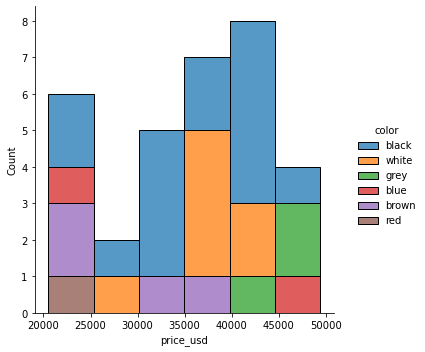

In [94]:
mercedes_benz = df[
    (df['manufacturer_name']=='Mercedes-Benz') &
    (df['body_type']=='suv') &
    (df['year_produced']>2013) 
    ]
sns.displot(data=mercedes_benz, x='price_usd', hue='color', multiple='stack')

## Medidas de dispersión
**Las medidas de dispersión** (también llamadas variabilidad, dispersión o propagación), comúnmente utilizadas en la estadística descriptiva y **buscan señalar la distribucion de las variables** creando intervalos **en un conjunto de datos** y **resumir dicha información en un solo valor** tomando como punto de referencia la media aritmética (promedio). 

Es necesario mencionar que **entre más grande su valor mayor será la dispersión** de los datos de una distribución, lo que se traduce a una menor exactitud y más inconsistencias y/o diferencias.

### Rango
Puede ser encontrado como recorrido, **es la diferencia entre el extremo mayor y el extremo menor de un conjunto de datos**, cuanto mayor es el rango, aún más dispersos están los datos. Nos deja ver que tan grande puede ser una variación o un cambio



Ejemplo:

Dado el conjunto de datos desordenados:
$$
x_{1}=185,x_{2}=165,x_{3}=170,x_{4}=182,x_{5}=155
$$
es posible ordenar los datos como sigue:
$$
x_{(1)}=155,x_{(2)}=165,x_{(3)}=170,x_{(4)}=182,x_{(5)}=185
$$
De este modo, **el rango sería la diferencia entre el valor máximo $\pmb{X_M}$ y el mínimo** $\pmb{X_m}$ , lo que es lo mismo:

$$
R = X_M - X_m
$$

En nuestro ejemplo, con cinco valores, nos da que $R=185-155=30$

In [95]:
conjunto_de_datos = np.array([185,165,170,182,155])
x_maximo = conjunto_de_datos.max()
x_minimo = conjunto_de_datos.min()
R = x_maximo-x_minimo
print(R)

30


### Rango intercuartil

En estadística descriptiva, se le llama **rango intercuartílico** o rango intercuartil, a la **diferencia entre el tercer cuartil** $(Q3)$ **y el primer cuartil** $(Q1)$ de una distribución.

$$
RQ = Q3 - Q1. 
$$

#### **Cuartiles**

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales.

- **1er cuartil** **(Q1)**

25% de los datos es menor que o igual a este valor.

- **2do cuartil** **(Q2)**

La mediana. 50% de los datos es menor que o igual a este valor.

- **3er cuartil** **(Q3)**

75% de los datos es menor que o igual a este valor.

- **Rango intercuartil**

La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

#### **Diagrama de caja o box plot**

representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.



Cuartiles con Numpy
 
1er cuartil: 165.0
2do cuartil: 170.0
3er cuartil: 182.0

Diagrama de caja


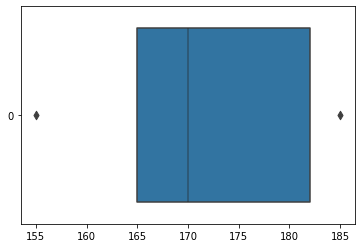

In [96]:
print('Cuartiles con Numpy')
print(f""" 
1er cuartil: {np.quantile(conjunto_de_datos,0.25)}
2do cuartil: {np.quantile(conjunto_de_datos,0.50)}
3er cuartil: {np.quantile(conjunto_de_datos,0.75)}
""") # Cuartiles con Numpy

# print('Cuartiles con Pandas')
# display(pd.DataFrame(conjunto_de_datos).describe()) # Forma de sacar mas facil los cuartiles con PanDas

print('Diagrama de caja')
sns.boxenplot(data=conjunto_de_datos, orient='horizontal');

### Desviacion estandar 
**Promedio**

$\overline{x} = {\displaystyle \mu ={\frac {1}{N}}\sum_{i=1}^{N}x_{i}\longrightarrow \text{La mediana se puede reescribir como }\mu}$

#### Que es la varianza
Es una medida de dispersión que **representa la variabilidad de una serie de datos respecto a su mediana**, cuanto mayor sea la varianza mayor dispersión existirá y, por tanto, menor representatividad tendrá la media aritmética. 

Formalmente se calcula como la suma de los residuos al cuadrado divididos entre el total de observaciones. Su fórmula es la siguiente:
##### Formula Fundamentales



**Varianza Poblacional**

${\displaystyle \sigma^2 = \frac{1}{n} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}\rightarrow$ Poblacion

**Varianza Muestral**

${\displaystyle s^{2} = \frac{1}{n-1} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}\rightarrow$ Muestra

**Ejemplo de un dado**

Un dado de seis caras puede representarse como una variable aleatoria discreta que toma, valores del 1 al 6 con probabilidad igual a $\frac{1}{6}$. 

Primero calculamos el promedio

${\displaystyle\mu = \frac{(1+2+3+4+5+6)}{6}}$

${\displaystyle\mu = {3,5}}$ 

Por lo tanto, su varianza es:


${\displaystyle\sigma^2=\sum_{i=1}^6 \tfrac{1}{6} (i - 3,5)^2}$

${\displaystyle\sigma^2=\tfrac{1}{6}\left((-2,5)^2{+}(-1,5)^2{+}(-0,5)^2{+}0,5^2{+}1,5^2{+}2,5^2\right)}$

${\displaystyle\sigma^2=\tfrac{1}{6} \cdot 17,50 }$

${\displaystyle\sigma^2=\tfrac{35}{12} = 2.9166666666666665}$
___


#### Que es la desviación estándar
En estadística, **la desviación estándar** (también conocida como desviación típica y desvío típico), **representada** de manera abreviada **por la letra** griega minúscula **sigma** $\pmb\sigma$ o la letra latina s, así como por las siglas SD (de standard deviation, en textos del inglés) es una medida que **se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos**.​
##### Formula Fundamentales

${\displaystyle \sigma = \sqrt{\frac{1}{n} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}}\rightarrow$ Desviacion estandar Poblacional

${\displaystyle s = \sqrt{\frac{1}{n-1} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}}\rightarrow$ Desviacion estandar Muestra

Ejemplo de un dado

Continuano el ejercicio anterior del dado de 6 caras.

Podemos resumir que la desviación estándar es la raíz cuadrada de su varianza. Asi que procedemos a calcular la desviación estándar:

${\displaystyle\sigma^2=\tfrac{35}{12}}$

${\displaystyle\sigma=\sqrt{\tfrac{35}{12}}}$

${\displaystyle\sigma=1.707825127659933}$

[Video con ejemplo representativo](https://www.youtube.com/watch?v=hLmsEFNaOgY)


#### Valor Atipico (outliner)

En estadística, **un valor atípico** (en inglés outlier) **es una observación que es numéricamente distante del resto de los datos**.

Podemos definir que

- Alrededor del **68,26 %** de todos los datos se encuentran dentro de una desviación estándar $( <σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la región rosa de la figura.

- Alrededor del **95,44 %** de todos los datos se encuentran dentro de dos desviaciones estándar $( 2σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la región rosa+azul de la figura.

- Alrededor del **99,72 %** de todos los datos se encuentran dentro de las tres desviaciones estándar $( <3σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la región rosa+azul+verde de la figura.

- Y el **0,28%** restante de todos los datos se encuentra fuera de las tres desviaciones estándar $( >3σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la pequeña región roja de la figura. Y esta parte de los datos se considera como valores atípicos .

- Los cuartiles primero y tercero, $Q1$ y $Q3$ , se encuentran a **-0.675σ** y **+0.675σ** de la media, respectivamente.

![](https://miro.medium.com/max/1400/1*ARpoeY3MdhFImq0JXAXtRw.png)


#### Deteccion de Outliers mediante Rango Intercuartil
Para definir los valores atipicos de una distribusion de datos simetricas usamos el metodo de deteccion de valores atipicos (outliers), ayudandonos del Rango intercuartílico (IQR)

$$
\text{Valor Atipico}
    \begin{cases}
        min = Q_1 -1.5*IQR \\
        max = Q_3 +1.5*IQR \\
    \end{cases}
$$

$$
\text{Valor Extremo}
    \begin{cases}
        min = Q_1 -3*IQR \\
        max = Q_3 +3*IQR \\
    \end{cases}
$$
Todos los datos que se encuentren fuera de estos rangos se coincideran datos anomalos,
___
Pero cuando la distribucion de datos es asimetrica no aplica el criterio anterior de $Q_3 \pm-1.5*IQR$, ya los cuartiles no estarian en una distancia simetrica de la mediana, teniendo el extremo superior mas corto que el inferior o viseversa.
$$
     \begin{cases}
         min = Q_1 -1.5*f(IQR) \\
         max = Q_3 +1.5*g(IQR) \\
     \end{cases}
$$

La idea de las funciones, es que a diferencia de la distribucion gaussiana, queremos dar sesgo de la asimetria de la funcion, y poder calcular los valores asimetrico de los extremos minimos y maximos


[Why “1.5” in IQR Method of Outlier Detection?](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

### Medidas de dispersión en Python (Practica)


In [97]:
# Seguiremos trabajando con la base de datos dada
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


Desviacion Estandar


In [98]:
# Desviacion estandar

# Calcular la desviacion estandar en python es tan simple como esto, pero es importante entender el transfondo matematico para ser buenos programadores :)

std_poblacional = df['price_usd'].std(ddof=0)
std_muestral = df['price_usd'].std(ddof=1)


print(std_poblacional, std_muestral)


6428.068602333533 6428.152018202915


Rango

In [99]:
# Rango = valor max - valor min

rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

Quartiles

In [100]:
# Cuartiles

# Como sabemos la mediana es uno de los valores de los cuartiles, asi que procedemos a calcularla

mediana = df['price_usd'].median() 

q1 = df['price_usd'].quantile(0.25)
q3 = df['price_usd'].quantile(0.75)

min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1)


print(min_val, q1, mediana, q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [101]:
# Podemos hacerlo tambien de una forma mas facil para tener los cuartiles, valores max y min, mediana y promedio
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

Rango intercuartil

In [102]:
# Rango Intercuartil (IQR)
iqr = q3-q1
iqr

6890.0

**Limites para deteccion de outliners (datos simetricamente distribuidos)**


$\text{Datos entre} 
\begin{cases}
    {\displaystyle{Q_1-1.5*IQR}} \\
    \text{y}\\
    {\displaystyle{Q_3 + 1.5 * IQR}}\\
\end{cases}
$

In [103]:
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

print(f"""
{min_limit}
{max_limit}
""")


-8235.0
19325.0



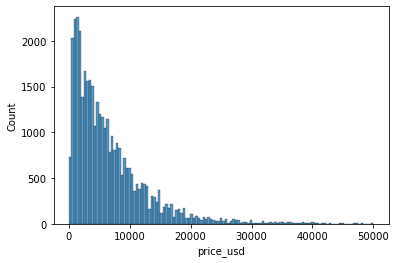

In [104]:
# Graficar
sns.histplot(data=df ,x='price_usd');

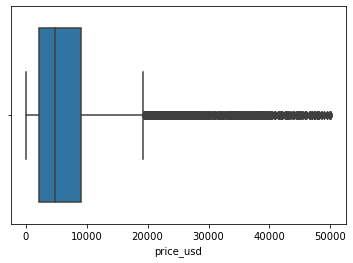

In [105]:
sns.boxplot(data=df ,x='price_usd');


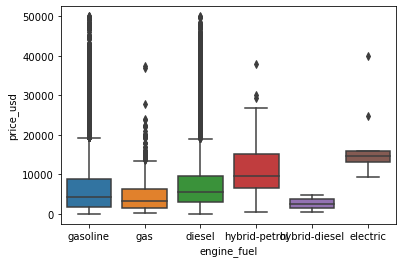

In [106]:
sns.boxplot(data=df ,x='engine_fuel', y='price_usd');

In [107]:
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

**Conclusion**

La estadistica descriptiva tiene 2 componentes fundamentales
podemos resumir datos mostrnado numeros concretos mostrando numeros como los cuartiles, valores max y min, mediana y promedio
o con visualizaciones, la estadistica descriptiva tiene un componente de visualziacion importante como vimos con los histogramas y diagramas de caja (boxplot)

## Exploración visual de los datos
Podemos dividir en 2 bloques la forma de presentar la información:

- Analíticamente:
    - Medidas de Tendencia Central
        - Mediana
        - Media
        - Moda
    - Medidas de Dispersión
        - Desviación estándar
        - Cuartiles
        - Rango
- Visualmente:
    - Histogramas
    - BoxPlot

Hay que entender que podemos presentar la información de distintas formas, de una manera Analítica, donde presentamos resultados numéricos y Visualmente donde preparamos la información en gráficos para poder facilitar la comprensión de las matematicas analiticas y su interconexión.

>"Una imagen vale mas que mil palabras.
>
>Pero una buena imagen..."

Tenemos que comprender que para cada imagen, tendrá un uso en especifico, como un grafico de pastel usaríamos para representar una encuesta electoral, o un diagrama de dispersión para representar la correlación de datos en el crecimiento de una nación

Por este motivo es bueno que tengamos un catalogo de los distintos tipos de visualización de datos que podemos usar, para poder elegir la mejor imagen para transmitir los datos.

- https://datavizproject.com/
- https://www.python-graph-gallery.com/
- https://www.data-to-viz.com/

## Diagramas de dispersión en el análisis de datos

**Scatterplot o diagrama de dispersion**

Todo lo que hemos hecho en el artículo es **analizar 1 columna de un conjunto de datos**, y esto en estadística **se llama análisis univariado**, nos enfocamos en una sola variable y analizamos la dispersión, desviación estándar, el promedio, la mediana, etc. Hasta el momento solo hemos analizado una variable numérica siendo segmentada por una variable categórica, por ejemplo: el precio de cada auto según el tipo de motor que tiene 

**Cuando queremos saber** cómo son **las variaciones de una variable con respecto a las de otra variable, donde ambas sean numéricas**, para esto **tenemos el diagrama de dispersión**, donde **vamos a poder sacar más provecho a la estadística para ver las correlaciones de dichas variables numéricas** y además de ser un concepto importante, hay que manejar con mucha delicadeza, porque suele conducir a confusiones y malas interpretaciones.

Cabe recalcar **que la existencia de correlación entre dos variables no significa que exista una relación de causalidad, en el siguiente artículo se hablará sobre este tema.

[4 Important Reasons To Stop Confusing Correlation with Causality](https://www.linkedin.com/pulse/4-important-reasons-stop-confusing-correlation-jon-robison/)

![](https://media-exp2.licdn.com/dms/image/C4D12AQFOEnfzWfJwlQ/article-inline_image-shrink_1500_2232/0/1520230984147?e=1660780800&v=beta&t=x9Zo2HlTaQ8DLWqXKwtc9FqQiPUvx3qQcjR4omPscyE)

In [108]:
# Usaremos Pandas y Seaborn para las visualizaciones y lectura de los dataframes

# Trabajaremos con un dataset distinto al de los autos
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Grafico sin segmentacion categorica


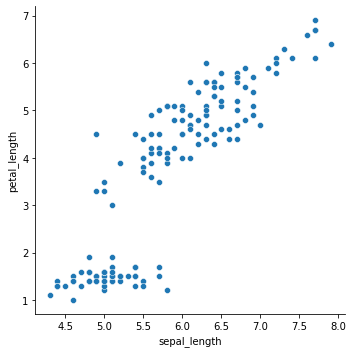

Grafico con segmentacion categorica


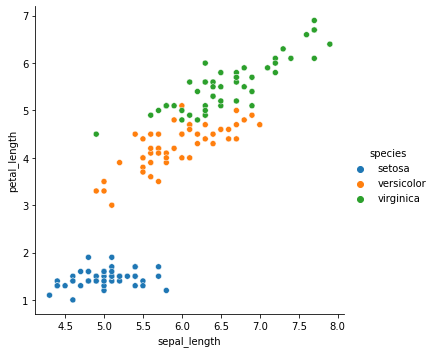

Al principio parece no existir una relación entre las distintas flores en el gráfico de dispersión, pero cuando segmentamos las flores por su categoría de especies, podemos ver las grandes diferencias que nos permite segmentar las especies en términos de estos atributos específicos


In [109]:
#  scatterplot
sns.relplot(
    kind='scatter', 
    data=iris, 
    x='sepal_length', 
    y='petal_length',
    )
print('Grafico sin segmentacion categorica')
plt.show()

sns.relplot(
    kind='scatter', 
    data=iris, 
    x='sepal_length', 
    y='petal_length',
    hue='species',
    )
print('Grafico con segmentacion categorica')

plt.show()
print('Al principio parece no existir una relación entre las distintas flores en el gráfico de dispersión, pero cuando segmentamos las flores por su categoría de especies, podemos ver las grandes diferencias que nos permite segmentar las especies en términos de estos atributos específicos')

 Trabajamos con el diagrama Joinplot para poder 


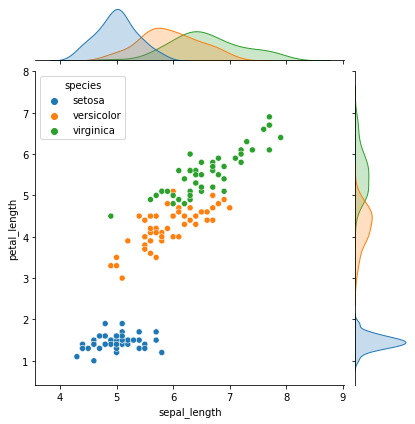

In [110]:
# joinplot

sns.jointplot(
    data=iris, 
    x='sepal_length', 
    y='petal_length',
    hue='species',)

print(' Trabajamos con el diagrama Joinplot para poder ')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

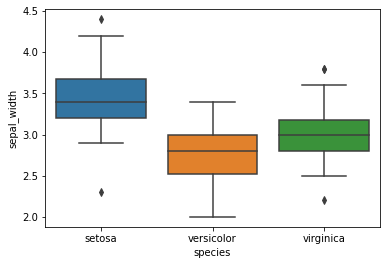

In [111]:
# box plot
sns.boxplot(    
    data=iris,
    x='species',
    y='sepal_width' 
    )

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

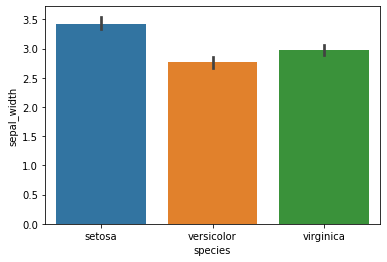

In [112]:
# barplot

sns.barplot(data=iris, x='species', y='sepal_width')

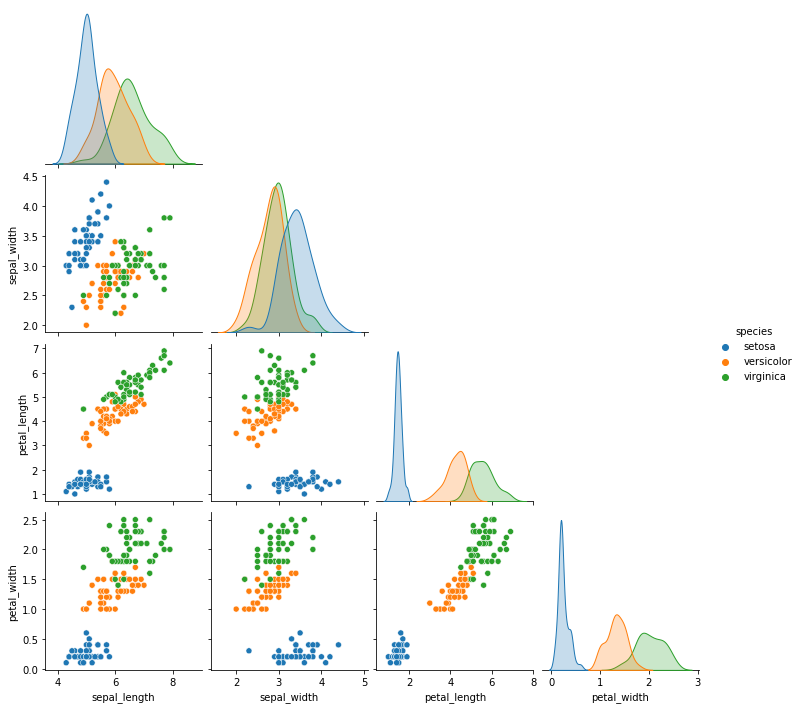

Podemos ayudarnos de pairplot para poder visualizar las distintas relaciones de las variables en el dataset de forma rápida, y ver como se segmentan, de esta forma cabe a resaltar que la iris virginia tiende a ser más grande que las cetosas y versicolor en casi todas sus variables, excepto en el largo del sépalo con su ancho, donde la iris setosa es más ancha que y larga que sus otras dos especies


In [113]:
# pairplot

sns.pairplot(
    data=iris, 
    hue=('species'), 
    corner=True,
    kind='scatter')
plt.show()
print('Podemos ayudarnos de pairplot para poder visualizar las distintas relaciones de las variables en el dataset de forma rápida, y ver como se segmentan, de esta forma cabe a resaltar que la iris virginia tiende a ser más grande que las cetosas y versicolor en casi todas sus variables, excepto en el largo del sépalo con su ancho, donde la iris setosa es más ancha que y larga que sus otras dos especies')

# Tema 3: Estadística en la ingesta de datos

## Pipelines de procesamiento para variables numéricas

> *La combinación de una base de datos transaccional, un lenguaje de programación, un motor de procesamiento y un almacén de datos da como resultado un pipeline.*
>
> -Data Engineering with Python. Packtpub

### Normalización
**La normalización** (tambien se lo puede encontrar como Escalamiento Lineal) es una técnica que a menudo se **aplica como parte de la preparación de datos para el aprendizaje automático** (Machine Learning). **El objetivo** de la normalización **es cambiar los valores de las columnas numéricas** en el conjunto de datos **para usar una escala común, sin distorsionar** las diferencias en **los rangos de valores ni perder información**. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente.

**Ejemplo**

**Supongamos que el conjunto de datos** de entrada **contiene una columna** con valores que van **del 0 a 1 y otra columna con valores** que van **del 10,000 a 100,000**. 

**La gran diferencia en la escala de los números causaria problemas al** intentar **combinar** los **valores** como características **durante el modelado.**

La normalización evita estos problemas al crear nuevos valores que mantienen la distribución general y las proporciones en los datos de origen, mientras mantienen los valores dentro de una escala aplicada en todas las columnas numéricas utilizadas en el modelo.

### Tipos de normalizacion
>**Nota importante** 
>
>Algunos algoritmos requieren que los datos se normalicen antes de entrenar un modelo. Otros algoritmos realizan su propia normalización o escalado de datos.

#### Z-score
El Z-score se basa en calcular el promedio $\mu$ y desviación estándar $\sigma$ de un conjunto de datos
${\displaystyle {\{x_1 \dots x_n\} \rightarrow \mu, \sigma}}$, y asumiendo que tenemos una distribución gaussiana, pasamos a usar la siguiente fórmula para normalizar el conjunto de datos

$$
{\displaystyle X_S = \frac{x-\mu}{\sigma}}
$$

De esta forma nos aseguramos que los datos normalizados, el promedio quede en 0 y la desviacion estandar en 1. Aunque no se ajusten todos los datos, si lo haran la gran mayoria al intervalo de [-1,1] para los algoritmos de Machine Learning

#### MinMax

El normalizador **min-max cambia los valores del conjunto de datos al intervalo [-1,1]**. El cambio de escala al intervalo [-1,1] se realiza cambiando los valores de cada característica para que el valor mínimo sea -1, y luego dividiendo por el nuevo valor máximo (que es la diferencia entre los valores máximo y mínimo originales). Los valores de la columna se transforman mediante la siguiente fórmula:

$$
{\displaystyle X_S = 
\frac
{2x-\text{min}(x)-\text{max}(x)}
{\text{max}(x)-\text{min}(x)}}
$$

[Info extra sofre la formula usada para el caso Min-Max normalization](https://en.wikipedia.org/wiki/Feature_scaling)

#### Clipping

Corta la distribución de los datos entre dos valores limite. El valor de cada dato fuera de los limites colapsa al valor del limite mas cercano.

#### Winzoriding
 
Usando percentiles específicos de limites.



## Transformación no lineal
Cuando los datos no se encuentran en una distribución simétrica, y no podemos usar los conceptos de la desviación estándar y el promedio, usamos un pensamiento matemático muy común:
>"Ante un problema desconocido, 
> lo transformó en problema conocido".

**A los datos que se encuentran distribuidos de una forma no simétrica, aplicamos una transformación no lineal para reducir la asimetría del conjunto, dejándolos distribuidos de forma simétrica**, y luego poder aplicar los escalamientos lineales para el modelaje en Machine Learning

### Por qué usarlos?
Usaremos transformaciones no lineales **cuando tengamos datos fuertementes sesgados, no simétricos.**

Ejemplo de conjuntos asimétricos

![](https://641f3ddf-a-62cb3a1a-s-sites.googlegroups.com/site/probyestacecytechig/parcial-ii/medidas-de-forma/medidas-de-sesgo-o-asimetria/GrafMedCorr2.png?attachauth=ANoY7cor_9-rbsSP15p_rkB-v6WwAGyoMKq6w6ZyhRywPU1PF1-t16LqGU9b2vvbE1-H6TPvZLcasWyIUE8_nJvnKYWXiBTaPT3oV411smFQP6NMQmqzpgxOm5rVTyamROcrG4TovlVugZMSgip13jSbWAof9Orlc3VdjKhm4VDl3h-fWoePtHMEcT9NajwlaxTD_SY1Pf1AazsJ4PPPE0uEQpzlV7mQujnG9Q2Xcu3OB6kW9pKmFkYSPs_lZ1HZghBTBB4AINTfjnUkn9SmUdmFqwtRMEoHtLgIlXmOdq4LhuiAotF1QbyJqNSN42i_hv6wnUrGeUCy&attredirects=0)

### Tipos de funciones no lineales

Los distintos tipos de funciones se pueden dividir en funciones **logarítmicas, sigmoides, polinomiales**, etc. Son funciones que **sirven para** tratar de **transformar a los datos para que sean mas simétricos**, o intentar de hacerlos mas homogénea la distribución de los mismos.

**Función log-normal**

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/Acumulada-lognormal.jpg" width="400">

**Función Sigmoide**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/1280px-Funci%C3%B3n_sigmoide_01.svg.png" width="400">

**Función Hiperbólica**

<img src="https://www.frsn.utn.edu.ar/funciones/images/tanh.png" width='400'>

### Cuando usar transformaciones no lineales?

**Al comienzo del pipeline, cuando** nos encontramos que **la distribución de los datos no es simétrica, y pasamos los datos por una transformación no lineal para luego poder aplicar el escalamiento lineal** y que los datos se encuentren en el rango adecuado para el modelo de machine learning

## Procesamiento de datos numéricos en Python


### Transformaciones Lineales

**Dependencias**

[Detalles del dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)


[Numpy Newaxis](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis)

In [114]:
import timeit #para medir el tiempo de ejecución de los modelos
from sklearn import datasets, linear_model #datasets para descargar un modelo y linear_model para hacer una regresión lineal


X,y = datasets.load_diabetes(return_X_y=True) # Cargamos el dataset
raw = X[:, None,2] # Transformamos las dimensiones para que se ajuste al formato de entrada pre procesamiento


**Regla de escalamiento**
$$
\text{Normalizacion min-max}\rightarrow
{\displaystyle X_S = 
\frac
{2x-\text{min}(x)-\text{max}(x)}
{\text{max}(x)-\text{min}(x)}}
$$

$$
\text{Normalizacion Z-score}\rightarrow{\displaystyle X_S = \frac{x-\mu}{\sigma}}
$$

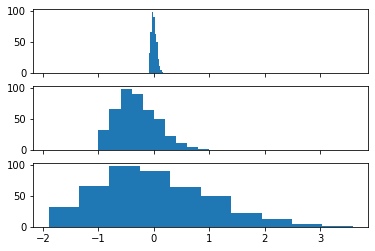

In [115]:
# min-max normalization
max_raw = max(raw)
min_raw = min(raw)

minmax_scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

# Z-score normalization
avg = np.average(raw)
std = np.std(raw)

z_scaled = (raw-avg)/std

# es importante tener una noción de los datos originales antes y después de escalarlos:
fig, axs = plt.subplots(3,1, sharex=True)

axs[0].hist(raw); # Conjunto original
axs[1].hist(minmax_scaled); # Conjunto minmax normalization
axs[2].hist(z_scaled); # Conjunto z-score normalization

**Modelos para entrenamiento**

In [116]:
def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(minmax_scaled,y)

def train_z_scaled():    
    linear_model.LinearRegression().fit(z_scaled,y)    

* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

In [117]:
raw_time = timeit.timeit(train_raw, number = 100) # repite la ejecución del código 100 veces y sobre eso calcula el tiempo
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)
print('    train raw: {}'.format(raw_time))
print(' train scaled: {}'.format(scaled_time))
print('train zscaled: {}'.format(z_scaled_time))

    train raw: 0.05017460000090068
 train scaled: 0.04403760000059265
train zscaled: 0.03595539999878383


**Se puede ver como al normalizar los datos, el algoritmo se vuelve más eficiente.**

Scikit Learn tiene una parte de prepocesamiento, en su documentación encontrarás cómo estandarizar datos numéricos y catergóricos.

[**Utilidades de Scikit Learn**](https://scikit-learn.org/stable/modules/preprocessing.html)
- 1. Estandarización, o remoción de la media y escalado de varianza
- 2. Transformación no lineal
- 3. Normalización
- 4. Codificación de características categóricas
- 5. discretización
- 6. Imputación de valores faltantes
- 7. Generando características polinómicas
- 8. Transformadores personalizados


**Transformaciones no lineales**


In [118]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


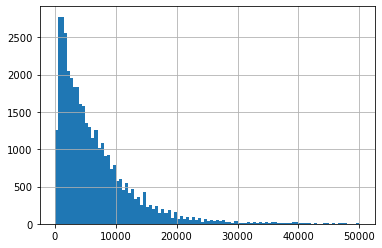

In [119]:
df.price_usd.hist(bins=100);

**Transformación con Tangente Hiperbólica (tanh(x))**

La tangente hiperbólica siempre está en un rango de -1 a 1 en Y, por lo que, cuando los valores de X son muy altos, estarán muy cercanos al |1|. También se podría calibrar los datos para ajustar la curva, dividiéndolos por un parámetro a.


<AxesSubplot:>

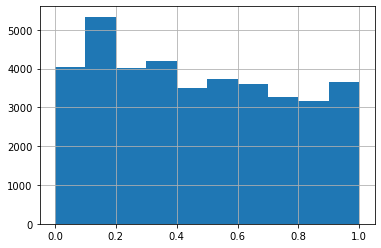

In [120]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

### **Práctica con la documentación**

En esta documentación encontrarás diversas maneras de hacer esas transformaciones no lineales. De esa manera podrás aplicar las funciones que trae Scikit Learn para hacer las transformaciones.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

Trataremos de conseguir una distribución gaussiana con los ejemplos dados en la documentación

- Paso 1

Comparemos la distribucion de los precios de los autos, con las distribuciones en la documentacion

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png" width='300'>


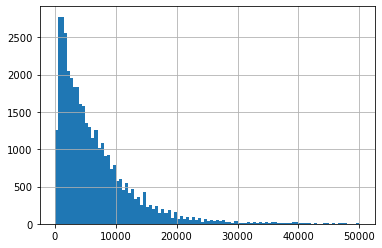

In [121]:
df['price_usd'].hist(bins=100);

- Paso 2

Nuestro conjunto de datos tiene forma de una distribucion Lognormal, teniendo de referencia la [documentacion para mapear datos](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html), y viendo los tipos de resultados, haremos la prueba de escalar los datos con el metodo **Box-Cox** y **Yeo Johnson** para conseguir una distribucion gaussiana

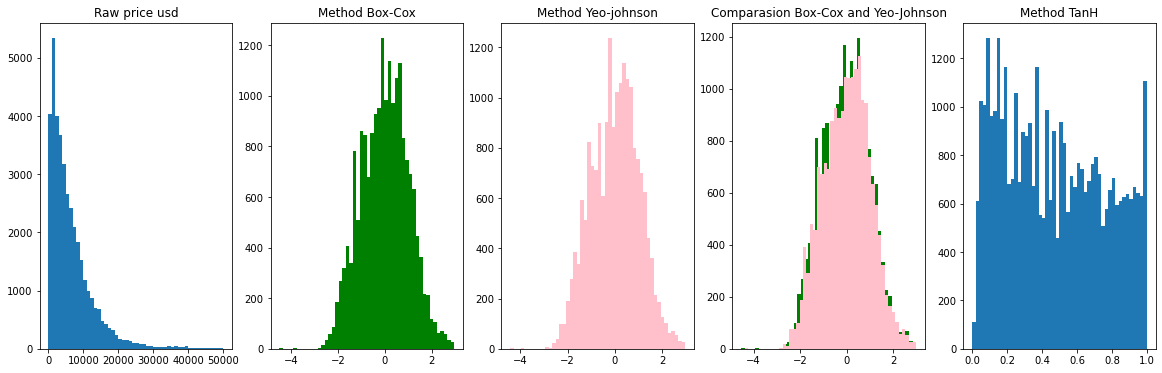

In [122]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

price = df.price_usd

bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
tanh = price.apply(lambda x: np.tanh(x/10000))


def map_data(method):
    # Convertimos el DF de Pandas a un array en Numpy
    x = price.to_numpy()
    # Redimensionamos el array a 1 dimension a 2 dimensiones
    x = np.reshape(x,(len(x),1))
    
    # Vaya a la documentacion de sklearn :p
    x_train, x_test = train_test_split(x,test_size=0.5)
    x_trans = method.fit(x_train).transform(x_test)
    
    return x_trans



fig, axs = plt.subplots(nrows=1,ncols=5, figsize=(20,6))

axs[0].hist(price,bins=50)
axs[0].set_title('Raw price usd')

axs[1].hist(map_data(bc),bins=50, color='green')
axs[1].set_title('Method Box-Cox')

axs[2].hist(map_data(yj),bins=50, color='pink')
axs[2].set_title('Method Yeo-johnson')

axs[3].hist(map_data(bc),bins=50, color='green')
axs[3].hist(map_data(yj),bins=50, color='pink')
axs[3].set_title('Comparasion Box-Cox and Yeo-Johnson')

axs[4].hist(tanh,bins=50);
axs[4].set_title('Method TanH');


## Pipelines de procesamiento para variables categóricas

Antes de abordar los métodos de procesamiento de variables categóricas, hay que tener en cuenta el siguiente concepto:

**independencia lineal**

- La independencia lineal tiene un trasfondo matemático.

- Normalmente se ve mucho en temas de álgebra lineal, ya que a partir de la independencia lineal se pueden construir tanto espacios vectoriales como múltiples aplicaciones para ecuaciones diferenciales y de matemática en general.

- Se puede decir que una variable es linealmente independiente si no puede obtenerse a partir de otras variables.

> Los 3 ejes de un sistema de coordenadas cartesianas son linealmente independientes, X,Y,Z.
>
> No puedes obtener X a partir de Y y Z, lo mismo para las otras 2

Cuando se tiene variables categóricas se hace un mapeo numérico. Para eso hay 2 métodos, de manera que sean fácilmente interpretables en modelos de machine learning:

### Método Dummy

Es la representación más compacta que se puede tener de los datos. Es mejor usarla cuando los inputs son variables **linealmente independientes** (no tienen un grado de correlación significativo). Es decir, las cuando se sabe que las categorías son independientes entre sí.

### Método One-hot

Te permite representar todas las categorías de forma que cuando llegue una categoría desconocida, o un valor no incluido inicialmente en el dataframe, el método One-hot lo pueda representar numéricamente y no como un error en el modelo.

> Otros esquemas de procesamiento de variables categóricas son:
> 
> [Bin Counting y Feature Hashing](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63)

## Procesamiento para variables categóricas con Python

¿Podemos tratar a las variables numéricas como categóricas? Claro que sí. **Todo depende del contexto y del proyecto.**

[Documentacion: One-Hot con PanDas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
)

[Ejemplo sobre One-hot con PanDas](https://www.youtube.com/watch?v=DAQhQFp-sCg&list=WL&index=5&t=318s)

In [123]:
pd.get_dummies(df['engine_type']) 
# Aunque La funcion se llame "get_dummies" de PanDas, hace referencia a un One-hot, se profundiza mas dentro de la documentacion. 

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


**Desventajas de One-hot con PanDas**

Aunque el resultado final sea el mismo al hacer procesamiento de variables con PanDas o Sckit, se ve afectada la eficiencia el usar DataFrames en comparacion a las matrices. No es recomendado trabajar con DataFrames para manipular grandes volumenes de datos.

**Procesar variables categóricas a numéricas**

La decodificación de variables categóricas a numéricas implica que cada elemento del nuevo vector se interpreta como una nueva variable. Por tanto, aumenta la dimensión del dataset y el tiempo de procesamiento.

[Documentacion: One-hot con Scikit](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) 

In [124]:
# Dependencias
import sklearn.preprocessing as preprocessing 
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [125]:
encoder.fit(df[['engine_type']].values);

In [126]:
eficiente = encoder.transform([['gasoline'],['diesel'],['oil']]).toarray()

id_columns = pd.DataFrame(df['engine_type'].drop_duplicates())
pd.DataFrame(eficiente, columns=id_columns['engine_type'])


engine_type,gasoline,diesel,electric
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0


**Procesar variables numéricas a categóricas** 

Las variables numéricas pueden ser codificadas como categóricas, pero esto trae una gran desventaja.

Al calcular categorías numéricas genera una desventaja con el método One-hot, ya que la dimensionalidad del dataset, se ve afectada por que el tamaño de la cantidad de variables que posee la categoría, creciendo la dimensionalidad del dataset a un punto que ya no es eficiente usar el método One-Hot 

**Ejemplo**

Tener que representar un texto de 50 millones de palabras, cada palabra se transformaría en un vector, donde tendríamos 50 millones de valores flotantes con todos los valores en cero, menos uno.

In [127]:
encoder.fit(df[['year_produced']].values);

In [128]:

no_eficiente = encoder.transform([[2016],[2019],[190]]).toarray()

id_columns = pd.DataFrame(df['year_produced'].drop_duplicates())
pd.DataFrame(no_eficiente, columns=id_columns['year_produced'])

year_produced,2010,2002,2001,1999,2011,1998,2004,2003,2008,2005,2014,2013,2006,2007,1997,1994,1993,1991,2016,2009,2012,1995,1992,2000,1996,2017,2015,1987,2018,1990,2019,1986,1977,1982,1981,1979,1978,1984,1980,1988,1985,1989,1960,1975,1972,1976,1959,1973,1983,1956,1962,1963,1974,1971,1968,1967,1966,1964,1969,1965,1950,1942,1961,1970
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlación

### ¿Qué es la correlación?

En probabilidad y estadística, la correlación **indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas.** Se considera que **dos variables** cuantitativas **están correlacionadas cuando los valores de una de ellas varían sistemáticamente con respecto a los valores homónimos de la otra**

Cuando trabajamos con la varianza en medidas de dispersión $var(x_1,\dots,x_n)=\frac{1}{n-1}\sum_{i=1}^{n}(x_1-\bar{x})^2=\sigma^2$), a esto era lo que llamamos varianza ($\sigma^2$) y asociamos con la desviación estándar ($\sigma$).

Estos conceptos nos ayudan al definir que **la correlación mide las desviaciones o variaciones de una variable X en relación de otra variable Y:** $ correlación\longrightarrow x,y$ dejándonos

Podríamos decir que agarramos las variaciones de cada elemento $X$, y multiplicarlas por cada elemento de la variable $Y$, y si a esto hacemos de misma manera que la varianza y realizamos la suma ($\sum$) todas estas variaciones y dividiéndolo por el número de elementos $n$, nos da lugar a la covarianza

### ¿Qué es la covarianza?

la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión.

**Fórmula fundamental de la covarianza**

$
\displaystyle{ COV_{poblacional} = \frac{1}{n} \sum_{i=1}^{n} (x_i-\bar{x})) * (y_i-\bar{y})}
$


$
\displaystyle{ COV_{muestral} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i-\bar{x}) * (y_i-\bar{y})}
$

Puede haber casos en que los componentes $X,Y$ estén ubicados en distintas unidades, donde el valor máximo de la variable $X$ sea $x_M = 10^6$ y el de la variable $Y$ sea $y_M = 5$. En estos casos los órdenes de magnitudes de las variaciones son muy distintos. 

Entonces lo que tratamos de hacer es estandarizar la escala, donde usamos el **coeficiente de correlación** $\pmb\rho$

### ¿Qué es el coeficiente de correlación?

**Es un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.**

Se podría decir que **es una manera para estandarizar variables de distintas unidades y magnitudes, a una misma escala**, dividiendo la covarianza por la desviación estándar, dejándonos como resultado el coeficiente de correlación ($\pmb\rho$) 

**Fórmula fundamental del coeficiente de correlación**

$
\displaystyle{\rho = \frac{\displaystyle{\sum_{i=1}^{N}(x_i-\bar{x})*(y_i-\bar{y})}}{
    \displaystyle{
        \sqrt{\frac{1}{n} *{\sum _{i=i}^{n}} (x_{i}-\bar{x})^2} * 
        \sqrt{\frac{1}{n} *{\sum _{i=i}^{n}} (y_{i}-\bar{y})^2}}
}} 
$

También se lo puede reescribir como:

$
\displaystyle{\rho=\frac{COV}{\sigma(x)*\sigma(y)}}
$

#### Interpretación del coeficiente de correlación

Cuando tenemos un Coeficiente de correlación $\rho$ elevado es porque las variables tienen una covarianza muy elevada, y cuando es baja es por que las variables tienen una covarianza muy baja

El valor del índice de correlación varía en el intervalo **[-1,1]** indicando el signo el sentido de la relación:

- Si ***r=1***, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.

- Si ***0<r<1*** entonces existe una correlación positiva.

- Si ***r=0*** entonces no existe relación lineal pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.

- Si **-*1<r<0***, existe una correlación negativa.

- Si ***r=-1***, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

<img src="https://i.imgur.com/0AKQKBi.png" width=800>


**Que exista correlación no implica que exista causalidad**

<img src="https://i.imgur.com/7JRDZgo.png" width="500">

## Matriz de covarianza

Una matriz de varianzas-covarianzas es una matriz cuadrada que contiene las varianzas y covarianzas asociadas con diferentes variables. Los elementos de la diagonal de la matriz contienen las varianzas de las variables, mientras que los elementos que se encuentran fuera de la diagonal contienen las covarianzas entre todos los pares posibles de variables.


$
{\displaystyle \Sigma =
{\begin{bmatrix}
    {\text{Var}}(X_{1})&{\text{Cov}}(X_{1},X_{2})&\cdots &{\text{Cov}}(X_{1},X_{n})\\
    {\text{Cov}}(X_{2},X_{1})&{\text{Var}}(X_{2})&\cdots &{\text{Cov}}(X_{2},X_{n})\\
    \vdots &\vdots &\ddots &\vdots \\
    {\text{Cov}}(X_{n},X_{1})&{\text{Cov}}(X_{n},X_{2})&\cdots &{\text{Var}}(X_{n})
\end{bmatrix}}}
$



### Practica

<AxesSubplot:>

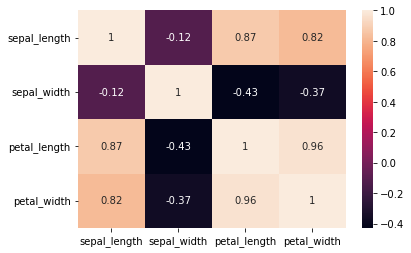

In [129]:
sns.heatmap(iris.corr(), annot=True)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

Visualización rapida de las correlaciones

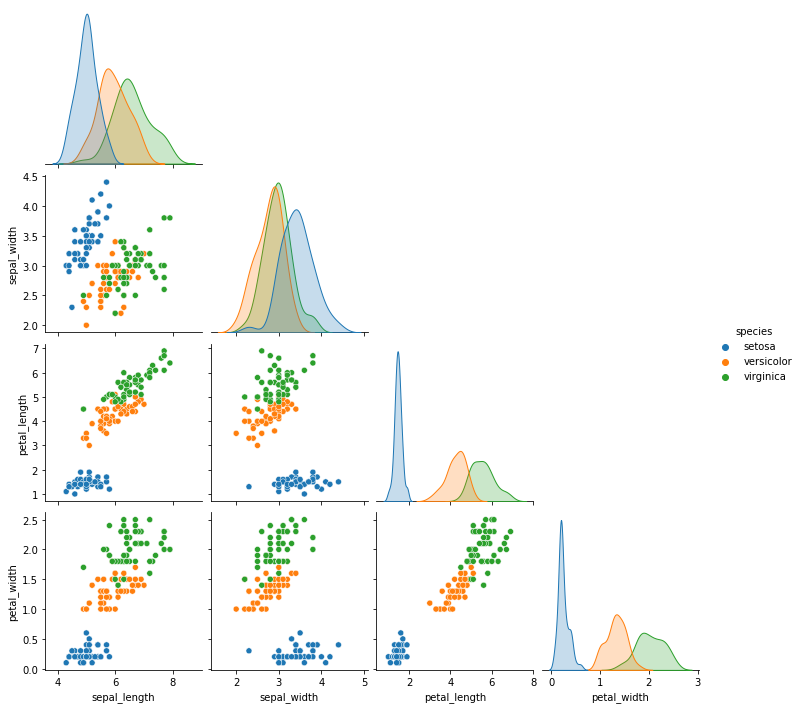

In [131]:
# Una forma rapida de visualizar las correlaciones de los datos del dataset, es usando el metodo visual "pairplot"

sns.pairplot(iris, hue='species' ,corner=True);


In [132]:
# Nombres de las columnas
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Paso 1: Normalizacion de las variables 

In [133]:
# Esta es la normalizacion de restar el promedio y dividir por la desv estandar por cada variable para que todas queden estandar
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
scaled;

# Todos estos numeros ya se encuentran normalizados de acuerdo a la distribucion misma de sus datos.

# Para calcular la matriz de correlaciones, asi que debemos hacer la matriz Transpuesta

Paso 2: hayar la matriz transpuesta

In [134]:
# Matriz Transpuesta
scaled.T;

Paso 3: Calcular la covarianzas de las variables

In [135]:
# Matriz de covarianza

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Paso 4: Graficar

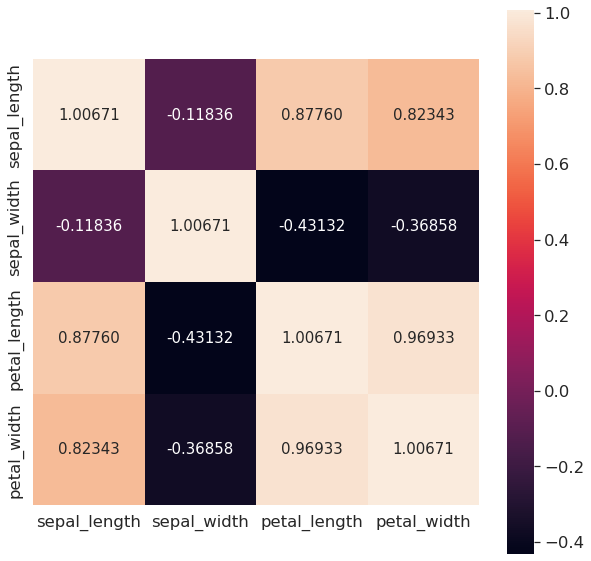

In [136]:
# Visualizacion de la Matriz de covarianza

# Graficamos con un mapa de calor ya que nos facilita la visualizacion de los datos 

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5) 

sns.heatmap(
    data=covariance_matrix, 
    annot=True, # Valores numericos dentro de la matriz
    cbar=True, # Barra a la derecha
    square=True, # no se
    fmt='.5f', # Decimales de los valores dentro de la matriz 
    annot_kws={'size':15}, # Tamano de fuente de los valores
    yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],# Leyenda X
    xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],# Leyenda Y
    );

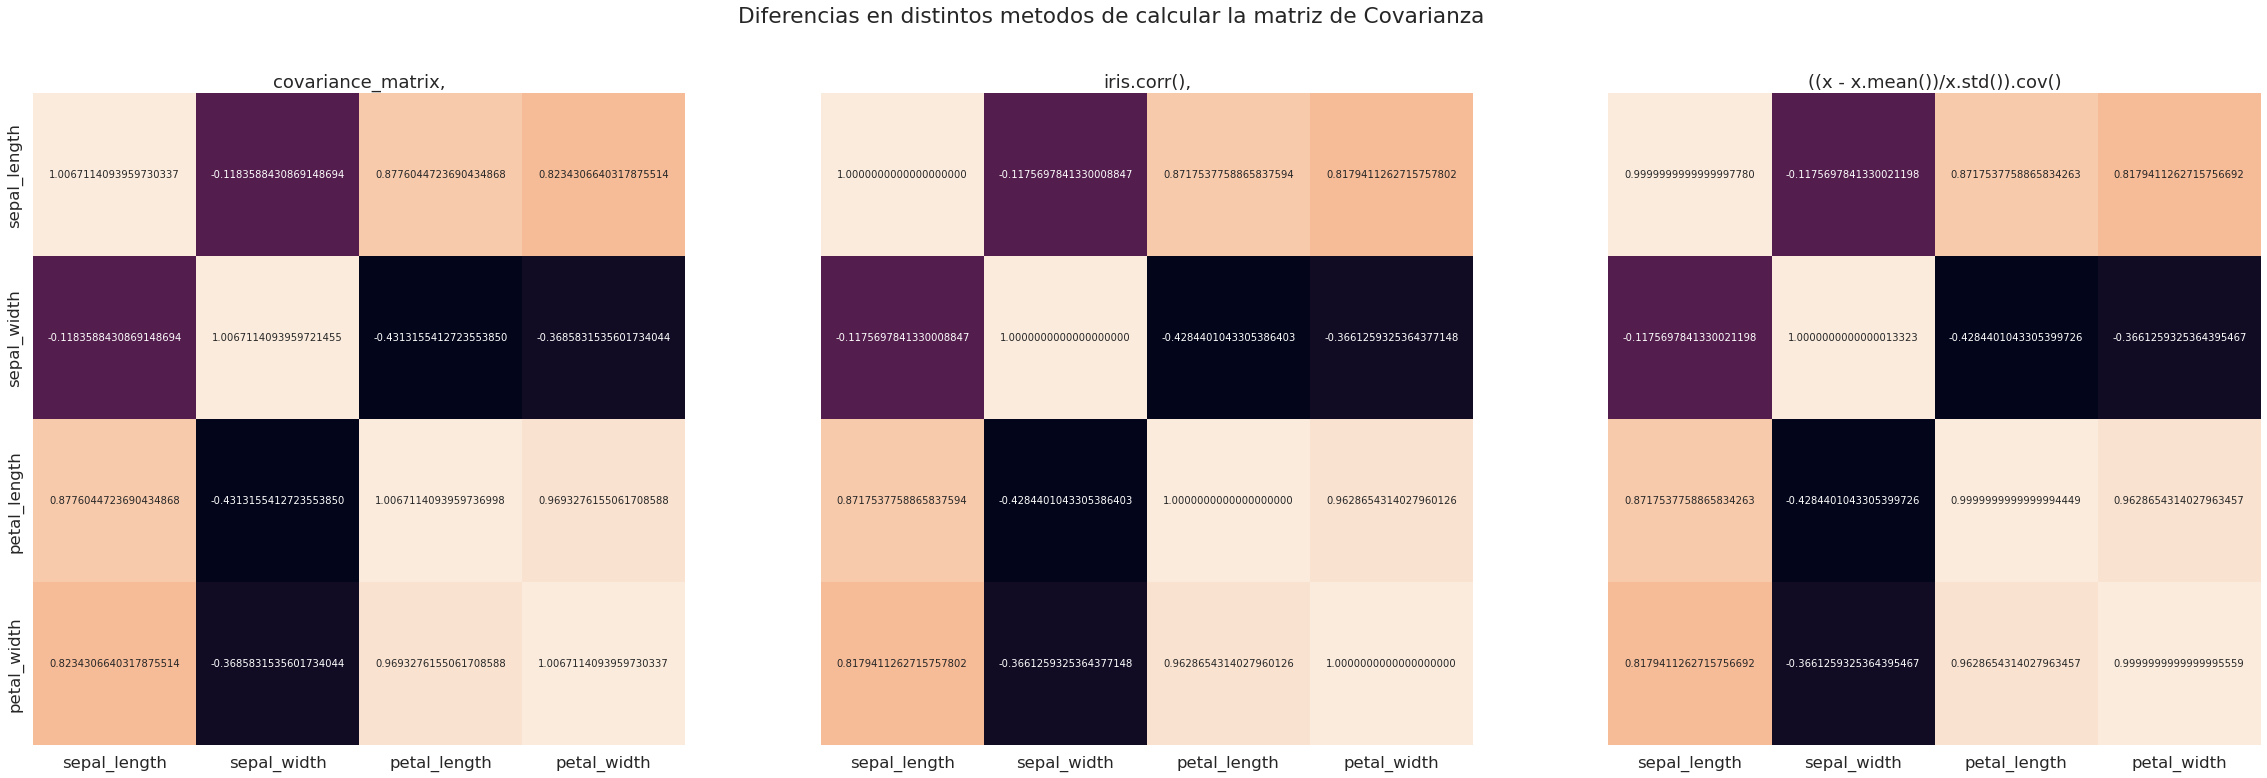

In [137]:
fig, axs = plt.subplots(1,3,figsize=(40,12),sharex=True,sharey=True)
fig.suptitle('Diferencias en distintos metodos de calcular la matriz de Covarianza')

# Si usas el metodo 3 sin este formato, te van a salir acomodados de una forma distinta la matriz de cov, pero con resultados correctos
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 

# Los 3 metodos con los que saque la matrix de cov
methods = {
    # Metodo usado en clase
    'covariance_matrix,':covariance_matrix, 
    # Metodo en los comentarios
    'iris.corr(),':iris.corr(), 
    # lo mismo que se supone que hace skitlearn pero sin ser parte de la libreria
    '((x - x.mean())/x.std()).cov()':((x - x.mean())/x.std()).cov().T} 


cont = 0
for title, method in methods.items():
    axs[cont].set_title(title)
    sns.heatmap(
        data=method,
        annot=True,
        cbar=False,
        # cmap='RdYlGn',
        square=True,
        fmt='.19f', 
        annot_kws={'size':10},
        yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
        xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
        ax=axs[cont]
    );
    cont+=1
    
plt.show()

# Tema 4: Proyecto de aplicación



## Cálculo de valores propios de una matriz

### PCA (Principal Component Analysis)

La tecnica de analisis de componentes principales, se aplica cuando 2 variables estan altamente correlacionadas, dando a entender que aportan la misma informacion

El PCA es una tecnica basada en el Algebra de Vectores y Matrices, que llamamos Calculo de Valores propios de una matriz

### Vectores y Valores propios de una matriz

En álgebra lineal podemos tener ecuaciones donde la incógnita es un vector, supongamos la siguiente ecuación:

$\displaystyle{A*\vec{x} = \lambda\vec{x}}$

Aquí A es una matriz cuadrada NxN cuyos elementos conocemos perfectamente y X es un vector columna cuyas componentes desconocemos. Aquí recordemos que multiplicar un vector por un número es simplemente multiplicar cada componente del vector por dicho número.

Entonces lo que esta ecuación nos pregunta es:

¿Existen vectores X tales que al multiplicarlos por la matriz A eso es equivalente a simplemente multiplicarlos por un número?

Si tal vector existe y está asociado a un valor específico de λ, entonces decimos que el vector X es un vector propio de la matriz A y λ es su valor propio correspondiente.

Consideremos esto para el caso de una matriz 2 x 2, como la siguiente:

$\displaystyle{{\begin{bmatrix}1&2\\1&0    \end{bmatrix}}*{\begin{bmatrix}x\\ y \end{bmatrix}}= \lambda {\begin{bmatrix}x \\ y \end{bmatrix}}}$

Esto se traduce en el sistema de ecuaciones (haciendo el producto matriz por vector):

$\displaystyle{{\begin{bmatrix}x&+&2y\\ &x&    \end{bmatrix}}={\begin{bmatrix} \lambda{x}\\ \lambda{y} \end{bmatrix}}}$

Aquí entonces debemos encontrar las combinaciones de $x$, e $y$ que satisfacen el sistema de ecuaciones.

En general, hacer esto requiere otros conceptos más detallados del álgebra de matrices como el cálculo de determinantes y resolver ecuaciones polinomiales cuya explicación solo puede dejarse a un proximo articulo exclusivo de Algebra Lineal. Pero ahora haremos la practica de manera rapida con python!

### Practica en Python:

In [138]:
import numpy as np

A = np.array([[1,2], [1,0]])
values, vectors = np.linalg.eig(A)

Donde la matriz A contiene los elementos exactos de la matriz anterior y el comando **np.linalg.eig(A)** lo que hace es calcular directamente los valores y vectores propios, llamados values y vectors en el código, respectivamente.

Verás que esta matriz tiene dos valores propios:

In [139]:
values

array([ 2., -1.])

Con sus respectivos vectores propios asociados:

In [140]:
vectors

array([[ 0.89442719, -0.70710678],
       [ 0.4472136 ,  0.70710678]])

Aquí es importante anotar que los vectores que entrega la función np.linalg.eig(A) son vectores columna de manera que los elementos de la primera columna de vectors corresponden con el primer valor de values y así sucesivamente. Entonces en nuestro lenguaje matemático usual, escribimos las dos soluciones como:

$\displaystyle{{\begin{bmatrix}x\\ y \end{bmatrix}} = {\begin{bmatrix}0.89442719\\0.4472136     \end{bmatrix}}, \lambda{}=2}$

$\displaystyle{{\begin{bmatrix}x\\ y \end{bmatrix}} = {\begin{bmatrix}-0.70710678\\0.70710678     \end{bmatrix}}, \lambda{}=-1}$

Puedes verificar que cada vector y su respectivo valor propio cumplen la ecuación original ejecutando cada parte así:



In [141]:
np.matmul(A, vectors.T[1])

values[1]*vectors.T[1]

print(
f'''
np.matmul(A, vectors.T[1])
Que te da como resultado: {np.matmul(A, vectors.T[1])}

values[1]*vectors.T[1]
Mientras que por otro lado calculando: {values[1]*vectors.T[1]}

Dando los mismos resultados
''')



np.matmul(A, vectors.T[1])
Que te da como resultado: [ 0.70710678 -0.70710678]

values[1]*vectors.T[1]
Mientras que por otro lado calculando: [ 0.70710678 -0.70710678]

Dando los mismos resultados



In [142]:
values[1]*vectors.T[1]

array([ 0.70710678, -0.70710678])

Donde hemos considerado el segundo vector y valor propio respectivamente tomando λ = -1 y el vector incógnita X igual a vectors.T[1].

Uno de los hechos más importantes de obtener los vectores y valores propios de una matriz es poder diagonalizarla. En general se define que una matriz A es diagonalizable si es posible escribirla como el producto de:

$\displaystyle{A=P*D*P^{-1}}$

Donde D es una matriz diagonal (matriz donde todos los elementos por fuera de la diagonal son cero), un ejemplo de matriz diagonal sería:

$\displaystyle{D = {\begin{bmatrix} 1&0&0 \\ 0&2&0 \\ 0&0&-2  \end{bmatrix}}}$


Y aquí un resultado matemático bien conocido es que si una matriz es diagonalizable, la matriz D se construye colocando sus valores propios en la diagonal y la matriz P se construye colocando en cada columna el vector propio,siguiendo el mismo orden de valores propios correspondientes de la matriz D, así:

$\displaystyle{{P*DP^{-1}={\begin{bmatrix}\vdots&\vdots&\vdots\\\vec{x_{1}}&\vec{x_{2}}&\vec{x_{3}}\\\vdots&\vdots&\vdots\end{bmatrix}}}{\begin{bmatrix}\lambda{1}&0&0\\0&\lambda{2}&0\\0&0&\lambda{3}\end{bmatrix}}}{\begin{bmatrix}\vdots&\vdots&\vdots\\\vec{x_{1}}&\vec{x_{2}}&\vec{x_{3}}\\\vdots&\vdots&\vdots\end{bmatrix}}$


Lo importante de estudiar este procedimiento , es que cuando aplicamos este cálculo de vectores y valores propios a una matriz de covarianza, los vectores representan las direcciones a lo largo de las cuales percibimos la mayor cantidad de varianza de ese conjunto de datos, donde la cantidad de varianza es proporcional al valor propio de cada vector propio.

Y es importante tener en cuenta que este procedimiento aplica para un conjunto de datos con N variables al que le corresponde una matriz de covarianza de tamaño NxN.

Ahora, el último factor importante de esta técnica es que para matrices de covarianza, sus vectores propios siempre son independientes unos de otros y esto es justamente lo que queremos en un proceso de reducción de variables, porque direcciones independientes implica que estos vectores representan nuevas variables cuya correlación es la más baja posible y así cada nueva variable es lo más representativa posible.

En álgebra lineal se dice más precisamente que los vectores propios de una matriz de covarianza son ortogonales y esto quiere decir que el producto interno de cualquier par de estos vectores siempre da como resultado cero:

$\displaystyle{\vec{x_{i}}*\vec{x_{j}}=0}$

Como consecuencia la matriz se denomina matriz ortogonal, y se sabe en matemáticas que la inversa de una matriz ortogonal es igual a la transpuesta, de manera que:

$A=P*D*P^{-1}=A=P*D*P^{T}$

[Diagonalización de Matrices en 4 pasos: EXPLICACIÓN COMPLETA](https://www.youtube.com/watch?v=-duROaTigUE)

[Vector propio y valor propio de una matriz Definición](https://www.youtube.com/watch?v=5ym3vnFrWtY)

## PCA: análisis de componentes principales
Requerimientos requeridos para la reducción de dimensionalidades a atreves del PCA
- Álgebra Lineal
- Producto entre Vectores y Matrices
- Los conocimientos previos en Estadística Descriptiva

Existen momentos en los que nos encontramos con muchas variables que no son relevantes para el modelado de Machine Learning.

Si hay Correlaciones interesantes, podemos reducir el número de variables a solo las que nos aportan la información mínima y necesaria. Para esto usamos el concepto de correlación, junto a las técnicas de Álgebra Lineal, se usan para desarrollar la Reducción de Dimensionalidad

Proyección de un vector sobre otro vector:

imagen 1

El dibujo nos muestra dos vectores $(a,b)$ que tienen direcciones arbitrarias. Hablamos de la proyección de un vector, o más coloquialmente de la sombra de un vector sobre otro geométricamente de la siguiente manera

Imaginamos que pintamos la sombra del vector $\vec{b}$

imagen 2

Y la sombra que proyecta $\vec{a}$ sobre $\vec{b}$ se vería tal que

imagen 3

A esa sombra producida por $\vec{a}$ en $\vec{b}$, es lo que **llamamos la proyección**. A esto se define de la siguiente manera

>"El vector $\vec{a}$ proyectado en el vector $\vec{a_{p}}$"

$\vec{a_{p}}$ se puede calcular como una nueva longitud que se llama longitud proyectada $a_{p}$ que tiene un valor numérico.

Entonces podemos decir que la sombra de ($\vec{a_{p}}$) es un vector de longitud $a_{p}$ que se encuentra en la dirección del vector $\vec{b}$ y $\vec{b}$ es un número unitario $\hat{b}$

$\displaystyle{\vec{a_{p}}=a_p\hat{b}}$

$\vec{a_{p}}$ se puede calcular como el producto interno entre los vectores $\vec{a_{p}}$ y $\vec{a_{p}}$, entre la longitud del vector b ( $|\hat{b}|$ )

$\displaystyle{{a_{p}}= \frac{\vec{a}*\vec{b}}{|\hat{b}|}}$

Ejemplo:

$\displaystyle{\vec{a} = (2,2)}$

$\displaystyle{\vec{b} = (1,0)}$

$\displaystyle{|\vec{b}| = 1 \rightarrow{\hat{b}=(1,0)}}$

$\displaystyle{\vec{a_{p}} = \frac{\vec{a}*\vec{b}}{|\hat{b}|}}$

$\displaystyle{\vec{a}*\vec{b} = {\begin{bmatrix} 2&2 \end{bmatrix}} * {\begin{bmatrix} 1 \\ 0 \end{bmatrix}} = 2*1 + 2*0 = 2}$

$\displaystyle{\vec{a_{p}} = \frac{2}{1}\hat{b}}$

$\displaystyle{\vec{a_{p}} = 2(1,0)}$

$\displaystyle{\vec{a_{p}} = (2,0)}$

Al final tenemos que el Vector Proyectado es $\vec{a_{p}} = (2,0)$

imagen 4

Como vemos al final del vector naranja, es la proyección del vector $\vec{a}$ que es el vector rosa, y vemos que su dirección original era de (2,2) y su proyección anula la componente $Y$ dejándonos un vector con dirección (2,0)

### Para qué sirve Proyectar un Vector?

Así como tenemos la matriz de covarianza ($\Sigma$), podemos hablar sobre cuál es la varianza a lo largo de cierta dirección en un conjunto de datos.

Cuando tenemos un conjunto con varias variables, cada una de ellas tiene una columna de datos y cada uno de esos datos tiene una distribución asociada en el plano de ejes cartesianos.

Por ejemplo

En un gráfico de ejes cartesianos 2D, podemos decir que tanto varían los datos si me muevo en $X$,en $Y$ o en cualquier dirección arbitraria, y resulta que en ciertas direcciones, se puede capturar mejor la variación de los datos.

Varianza en una dirección arbitraria

imagen 5

Hacemos un vector en una dirección cualquiera en el espacio

imagen 6

Y aplicamos el concepto de proyección en el dato seleccionado (esto podemos hacer con todos los puntos de datos)

imagen 7

Si en cambio escogemos otra dirección más cerca de los datos, la sombra que proyecté el vector verde en general es mayor

imagen 8

Es decir cuando la dirección del vector que estoy usando, está más relacionado con los datos, la proyecciones son mayores y así decimos que la covarianza que se está capturando es mayor.

**Para definir esto**

Si decimos que la varianza de unos datos, era la covarianza de un conjunto de datos:

$\sigma^2 = COV(x_1, \dots, x_n)$

Ahora podemos decir que es la covarianza a lo largo de las proyecciones del vector $\vec{v}$ a lo largo de cada uno de los datos dispersos en el eje cartesiano



$\sigma^2 = Var(\vec{v}*x_1,\dots,\vec{v}*x_n)$ 

(El valor $x_1$ en esta situación representa a la coordenadas $x_1,y_1$)

Un resultado interesante es que a este resultado se lo puede escribir en términos de la matriz de covarianza ($\Sigma$),

> $Var(\vec{v}*x_1,\dots,\vec{v}*x_n)= \vec{v^T}*\Sigma*\vec{v}$ 

### Cálculo de Valores Propios

$\displaystyle{\Sigma = {\begin{bmatrix}\vec{x_{1}}&\vec{x_{2}}&\dots&\vec{x_{n}}\end{bmatrix}}}{\begin{bmatrix}\lambda{1}&&\\&\dots&\\&&\lambda{n}\end{bmatrix}}{\begin{bmatrix}\vec{x_{1}}&\vec{x_{2}}&\dots&\vec{x_{n}}\end{bmatrix}^T}$

En álgebra lineal se sabe que los Valores propios, y Vectores propios, caracterizan la varianza en un conjunto de datos en términos de lo que se denomina las componentes principales.

Si al conjunto de datos se lo aprecia a lo largo de estos vectores, se capturará la mayor cantidad posible de varianza de los datos

Cabe recalcar que todo este proceso es para entender el mecanismo matemático detrás de la reducción de dimensionalidad, pero a la hora de llevarlo a cabo, usaremos python hacer las demostraciones prácticas, ya que en unas pocas líneas de código podemos calcular la Matriz propia, Vectores propios, y ver qué significa esto en el cálculo del PCA (Análisis de Componentes Principales)

- [Probability and Statistics for Data Science, Carlos Fernandez-Granda](https://cims.nyu.edu/~cfgranda/pages/stuff/probability_stats_for_DS.pdf)
- [Principal Component Analysis(Step by Step), StatQuest](https://www.youtube.com/watch?v=FgakZw6K1QQ)


## Reducción de dimensionalidad con PCA

El analisis de componentes principales nos permite por medio de los valores y vectores propios de la matriz de covarianza identificar las direccio espec a lo largo de las cuales capturamos la mayor cantidad de varianza de los datos, esto implica que un conjunto de datos de 10, 20, O 30 variables podamos reducirlo a una menor cantidad de variables, obteniendo la cantidad minima y necesariade varianza, facilitando al modelo de ML la cantidad de datos menor para que procesar.

### Practica en python

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Normalizacion: Z-score

iris = sns.load_dataset('iris')

# Normalizacion de los datos
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length','sepal_width','petal_length','petal_width']]
)

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

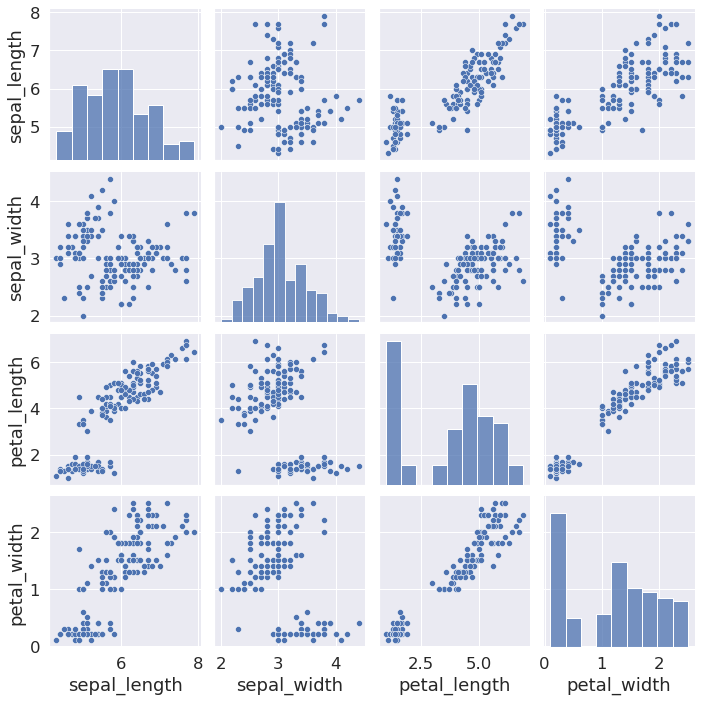

In [144]:
# Identificamos el minimo numero de variables para escribir nuestro dataset
sns.pairplot(iris)

Se identifica una buena correalacion entre la longitud y ancho de los petalos, de manera que nos enfocaremos en dibujar un diagrama de dispersion de estos datos usando un Joinplot con solo estas dos variables. Y comparamos el mismo diagrama con las variables estandarizadas.

Estandarizamos las variables antes de aplicar el PCA, ya que el PCA calcula la sombras de los vectores, pero coinciderando que los datos estan centrados, siendo mas evidente si tenemos un conjunto de datos tienen un promedio de 0 y una desviacion estandar de 1

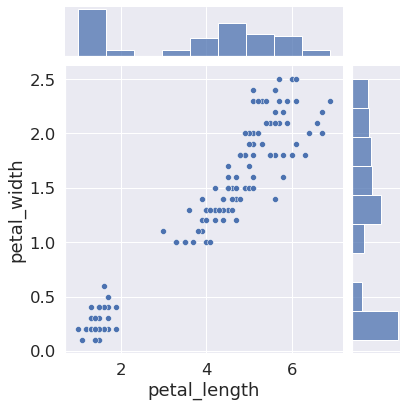

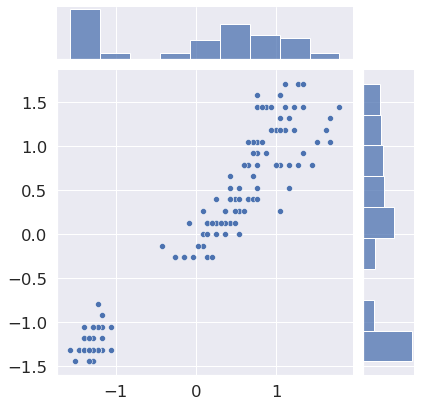

In [145]:
sns.jointplot(data=iris, x='petal_length', y='petal_width') # Datos sin Normalizar
sns.jointplot(x=scaled[:, 2], y=scaled[:, 3]) # Datos Normalizados

Descomposicion en vectores y valores propios: 

Usaremos de numpy el metodo eig, que se encarga de **calcular la descomposicion de vectores y valores propios de una matriz**.

(eig viene del aleman que significa "propio")

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [146]:
# eigen values: valores propios
# eigen vectors: vectores propios
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix) # Descomponemos la Matriz de Covarianza en las 3 matrices que necesitamos

Recordemos que los vectores y valores propios capturaran la mayor cantidad de varianza de los datos, y que cada una de estas direcciones es lo que llamamos una direccion principal. 

Cada vector propio es una de las direcciones principales a lo largo de la cual capturamos varianza de los datos originales

In [147]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [148]:
eigen_vectors 

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

Para poder ver esto mas claramente crearemos una lista que se llama Variance Explained

De acuerdo a la teoria matematica, la varianza se puede calcular proporcional a la relacion del valor propio particular, y la suma de todos los valores propios que estan dentro de la misma matriz $\displaystyle\frac{\lambda{i}}{\Sigma{\lambda{n}}}$, y lo multiplicamos por 100 para tener el porcentaje mas facil de leer.


In [149]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]


Podemos apreciar que el primer componente captura mas del 72% de la varianza total, el 2do el 22% y asi sucesivamente. Dandonos ya un indicio de que el 4to componente podemos descartarlo, y si nos arriesgamos tambien a despreciar un 3er componente dependiendo el contexto de uso

#### PCA con scikit : 

Ahora haremos la transformacion de transformar estos datos que se encuentran en 4 dimensiones y reducirlos en 2, ayudandonos de numpy y sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Creamos una instancia del elemento PCA, y le indicamos lo reduciremos a 2 componentes
pca.fit(scaled) # Hacemos el fit sobre los datos escalados (No hacerlo con los originales)

PCA(n_components=2)

In [151]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Podemos ver que las dos direcciones principales coinciden con el ejercicio que hicimos hace un momento con Numpy, siendo las mismas dos direcciones que capturan la mayor cantidad de varianza, y descarta las subsecuentes

#### Reduccion de los Datos

Ahora empezamos con la reduccion de los datos, creando nuevas variables, que surgen de la combinacion de las antiguas, y estas variables en cantidad de datos, son menores que las originales. Estas serian las variables que haremos entrar al modelo de Machine Learning, o proyecto en mano.

In [152]:
reduced_scaled = pca.transform(scaled) # Transformamos los datos escalados, y nos entrega la transformacion resultante de la descomposicion de valores y vectores propios

reduced_scaled[:5] # Ahora los data points poseen solo 2 componentes, a diferencia de antes que teniamos 4 componentes.

# Y cabe recalcar que se esta capturando mas del 90% de los datos, que ya podria ser contada como una cantidad decente

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

Ahora los que nos interesa saber evidenciar como se diferencia este dataset de las categorias de flores, ya que probablemente si realizamos esta tecnica de reduccion de variables, es con fin de entrenar un modelo de Machine Learning.

Imaginemos un modelo supervisado, que este asociado a categorias, como las especies de las flores en el dataset.

In [153]:
iris['pca_1'] = reduced_scaled[:,0] #  Principal Component 1 
iris['pca_2'] = reduced_scaled[:,1] #  Principal Component 2 
iris


,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254


Llegamos al paso final, que es ver como se verian visualmente este conjunto datos reducidos de componentes principales a 2 dimensiones y separandolos por su especie para evidenciar la data por color con cada categoria que tenemos.

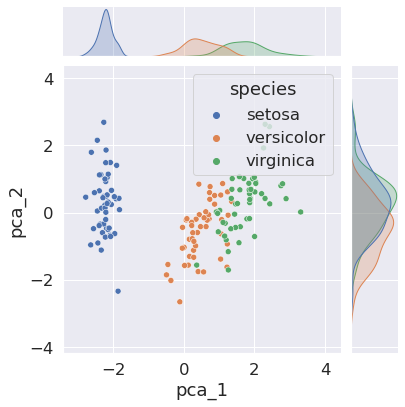

In [154]:
sns.jointplot(data=iris, x='pca_1', y='pca_2', hue='species')

Con esto se concluye esta recopilación sobre Estadística Descriptiva para Ciencias de Datos, y nos enfocamos en llegar a la parte de PCA por que representa la culminación de un pipeline típico en Ciencias de Datos.

En el cual aprendimos los elementos para que de un dataset crudo, diferenciar sus datos numéricos y categóricos, estandarizar lo numérico, escalar o en codificar lo categórico para que también quede numérico, y al final todo sean atributos numéricos que un modelo de Machine Learning pueda entenderlo sin ningún problema

El escalamiento lo realizamos para que la convergencia de los algoritmos sean lo mejor, donde encontramos las correlaciones y reducciones de dimensionalidad. Las correlaciones nos sirven para ver si hay dos variables en el dataset que puedan parecer diferentes aporten la misma información, siendo innecesario tenerlas a ambas, y solo necesitemos una. Entonces decimos que necesitamos reducir los datos, usando el PCA para preparar los datos crudos para que todos los datos quede en un solo formato numérico que contenga la menor cantidad de información, pero aun sea la suficiente para que nuestro algoritmo funcione bien, pueda hacer predicciones que sigan representando lo que los datos originales nos transmitía tanto en clasificación, predicción, etc.

# Conclusiones

La estadística descriptiva tiene dos visiones fundamentales 
- resumir información con números concretos (Desviación estándar, Promedio)
- resumir información con visualizaciones

Con esto la estadística descriptiva como una herramienta de análisis nos permite en dos bloques fundamentales de la ciencias de datos, en **Análisis exploratorio de la información**, y por otro lado en el **Procesamiento de la información antes de tener un modelo de Machine Learning**

Por que es esto tan importante?

Por que lo que encontraremos en la vida real es un dataset crudo, donde los datos puedan tener distritos tipos numéricos o categóricos, y hacer transformaciones sobre los números y categorías para que todo tenga un formato estandarizado y homogéneo que sea de fácil entendimiento para un Modelo de Machine Learning y ahí entendemos que el concepto de correlaciones es fundamental, entonces usamos las correlaciones para visualizar que variables tienen una alta relación una con otras, y evidenciar que hay variables que puedan resultar redundantes para dárselas como input a un modelo predictivo o de clasificación, entonces aquí es cuando todo esto adquiere una razón de ser.

Como conclusión final tenemos la técnica de Análisis de Componentes Principales, que es una herramienta muy poderosa, pero no es la única!

Ahora nos toca a nosotros mismos investigar cuáles otras técnicas más avanzadas existen para trabajar en el procesamiento y limpieza de un conjunto de datos.